In [ ]:
from bs4 import BeautifulSoup
import requests
import json
import re


In [ ]:
secciones = ["https://www.diariojornada.com.ar/provincia/",
            "https://www.diariojornada.com.ar/policiales/",
            "https://www.diariojornada.com.ar/sociedad/",
            "https://www.diariojornada.com.ar/deportes/", 
            "https://www.diariojornada.com.ar/paismundo/",
            "https://www.diariojornada.com.ar/economia/",
            "https://www.diariojornada.com.ar/espectaculos/",
            "https://www.diariojornada.com.ar/ciencia/"] 

data = []

for seccion in secciones:
    
    # Realizamos la petición a la web
    req = requests.get(seccion)

    # Comprobamos que la petición nos devuelve un Status Code = 200
    status_code = req.status_code
    if status_code == 200:
         # Pasamos el contenido HTML de la web a un objeto BeautifulSoup()
        soup = BeautifulSoup(req.text, "html.parser")

        # Obtenemos todos los enlaces donde están las noticias
        enlaces = soup.find_all('a')
        patron = re.compile(r'/\d')
        for e in enlaces:
            link = e.get('href')
            m = patron.search(link)
            if m != None:
                # Realizamos la petición al enlace de la noticia
                req = requests.get(link)
                # Comprobamos que la petición nos devuelve un Status Code = 200
                status_code = req.status_code
                if status_code == 200:
                    soup = BeautifulSoup(req.text, "html.parser")
                    seccion = soup.find('a').get_text()
                    titulo = soup.find('span', id = 'ContentPlaceHolder1_lbl_Titulo').get_text()
                    elementos_cuerpo = soup.find('div',id = 'cuerpo')
                    vistas = elementos_cuerpo.find('span').get_text()
                    cuerpo = elementos_cuerpo.find('p').get_text()
                    data.append({'seccion':seccion, 'titulo':titulo, 'vistas':vistas,'cuerpo':cuerpo})
    else:
        print ("Status Code %d" % status_code)

with open('noticias.json', 'w') as file:
    json.dump(data, file, indent=4)

print("paso")

In [8]:
## a. Mostrar cuáles son las 5 noticias más relevantes según cantidad de visitas a nivel global

with open('noticias.json') as file:
    data = json.load (file)
    for noticia in data:
        removed = noticia['vistas'].replace('.', '')
        noticia['vistas'] = removed
    
    relevantes = sorted(data,key=lambda k: int(k['vistas']),reverse=True)
    for i in range(5):
        print("seccion ",relevantes[i]['seccion'], "\n",
              "titulo ",relevantes[i]['titulo'],"\n",
              "vistas",relevantes[i]['vistas'],"\n")


seccion  POLICIALES 
 titulo  Murió un hombre tras un vuelco entre Gaiman y Trelew 
 vistas 11525 

seccion  SOCIEDAD 
 titulo  Trelew: el nuevo hogar de la familia Pérez 
 vistas 4965 

seccion  POLICIALES 
 titulo  Impactante: difunden el video del momento de la explosión que mató a Lucía 
 vistas 4883 

seccion  POLICIALES 
 titulo  Aberrante: mientras una nena de 11 años era abusada, su mamá le sacaba fotos y la filmaba 
 vistas 4739 

seccion  PROVINCIA 
 titulo  El Gobierno nacional dispuso que Comodoro y Madryn vuelvan a fase 1 
 vistas 4408 



In [9]:
## a. Mostrar cuáles son las 5 noticias más relevantes segun cantidad de visitas por seccion Provincia

with open('noticias.json') as file:
    data = json.load (file)
    provincia = []
    for noticia in data:
        if noticia['seccion'] == 'PROVINCIA':
            removed = noticia['vistas'].replace('.', '')
            noticia['vistas'] = removed
            provincia.append(noticia)
    
    relevantes = sorted(provincia ,key=lambda k: int(k['vistas']),reverse=True)
    
    for i in range(5):
        print("seccion ",relevantes[i]['seccion'], "\n",
              "titulo ",relevantes[i]['titulo'],"\n",
              "vistas",relevantes[i]['vistas'],"\n")

seccion  PROVINCIA 
 titulo  El Gobierno nacional dispuso que Comodoro y Madryn vuelvan a fase 1 
 vistas 4408 

seccion  PROVINCIA 
 titulo  Chubut reportó otros 285 casos de Covid y ya suman 291 los trabajadores de la Salud que se contagiaron 
 vistas 3221 

seccion  PROVINCIA 
 titulo  De Boca en Boca y #DesdeElTwitter 
 vistas 2449 

seccion  PROVINCIA 
 titulo  Hoy redoblarán los controles por el Covid-19 
 vistas 2328 

seccion  PROVINCIA 
 titulo  Anticipan que el turismo interno regresaría  con tres corredores y con 18 protocolos 
 vistas 1900 



In [10]:
## a. Mostrar cuáles son las 5 noticias más relevantes segun cantidad de visitas por seccion Policiales

with open('noticias.json') as file:
    data = json.load (file)
    policiales = []
    for noticia in data:
        if noticia['seccion'] == 'POLICIALES':
            removed = noticia['vistas'].replace('.', '')
            noticia['vistas'] = removed
            policiales.append(noticia)
    
    relevantes = sorted(policiales ,key=lambda k: int(k['vistas']),reverse=True)
    
    for i in range(5):
        print("seccion ",relevantes[i]['seccion'], "\n",
              "titulo ",relevantes[i]['titulo'],"\n",
              "vistas",relevantes[i]['vistas'],"\n")

seccion  POLICIALES 
 titulo  Murió un hombre tras un vuelco entre Gaiman y Trelew 
 vistas 11525 

seccion  POLICIALES 
 titulo  Impactante: difunden el video del momento de la explosión que mató a Lucía 
 vistas 4883 

seccion  POLICIALES 
 titulo  Aberrante: mientras una nena de 11 años era abusada, su mamá le sacaba fotos y la filmaba 
 vistas 4739 

seccion  POLICIALES 
 titulo  Paso del Sapo: empleados de la comuna, docentes y un peón rural demorados en una fiesta 
 vistas 3258 

seccion  POLICIALES 
 titulo  Asaltaron al "Roña" Castro: "Fue al voleo, me apuntaron con dos fierros" 
 vistas 3018 



In [11]:
## a. Mostrar cuáles son las 5 noticias más relevantes segun cantidad de visitas por seccion Sociedad

with open('noticias.json') as file:
    data = json.load (file)
    sociedad = []
    for noticia in data:
        if noticia['seccion'] == 'SOCIEDAD':
            removed = noticia['vistas'].replace('.', '')
            noticia['vistas'] = removed
            sociedad.append(noticia)
    
    relevantes = sorted(sociedad ,key=lambda k: int(k['vistas']),reverse=True)
    
    for i in range(5):
        print("seccion ",relevantes[i]['seccion'], "\n",
              "titulo ",relevantes[i]['titulo'],"\n",
              "vistas",relevantes[i]['vistas'],"\n")

seccion  SOCIEDAD 
 titulo  Trelew: el nuevo hogar de la familia Pérez 
 vistas 4965 

seccion  SOCIEDAD 
 titulo  Insólito: lo picaron mosquitos en el pie y ahora parece una pata de elefante 
 vistas 1812 

seccion  SOCIEDAD 
 titulo  Asensio Brunel, el matrero patagónico  que sólo comía lenguas de yegua 
 vistas 1180 

seccion  SOCIEDAD 
 titulo  Advierten que la mayoría de los incendios son iniciados por humanos  
 vistas 1015 

seccion  SOCIEDAD 
 titulo  Delta se degrada a tormenta tropical en su paso por el estado de Luisiana 
 vistas 701 



In [13]:
## a. Mostrar cuáles son las 5 noticias más relevantes segun cantidad de visitas por seccion Deportes

with open('noticias.json') as file:
    data = json.load (file)
    deportes = []
    for noticia in data:
        if noticia['seccion'] == 'DEPORTES':
            removed = noticia['vistas'].replace('.', '')
            noticia['vistas'] = removed
            deportes.append(noticia)
    for i in range(5):
        print("seccion ",relevantes[i]['seccion'], "\n",
              "titulo ",relevantes[i]['titulo'],"\n",
              "vistas",relevantes[i]['vistas'],"\n")
    relevantes = sorted(deportes ,key=lambda k: int(k['vistas']),reverse=True)
    

seccion  DEPORTES 
 titulo  Giro de Italia: Sepúlveda, protagonista de la novena etapa 
 vistas 926 

seccion  DEPORTES 
 titulo  Batallini: "Tampoco lo iba a llamar yo a Riquelme..." 
 vistas 685 

seccion  DEPORTES 
 titulo  Argentina subió a La Paz dos días antes de enfrentar a Bolivia 
 vistas 525 

seccion  DEPORTES 
 titulo  TRV6: Rubens Barrichello ganó en el Gálvez y Lucas Valle fue 5to 
 vistas 372 

seccion  DEPORTES 
 titulo  Nadal sigue siendo el "rey": arrasó a Djokovic y ganó por 13º vez Roland Garros 
 vistas 362 



In [14]:
## a. Mostrar cuáles son las 5 noticias más relevantes segun cantidad de visitas por seccion Pais y Mundo
    
with open('noticias.json') as file:
    data = json.load (file)
    pais_mundo = []
    for noticia in data:
        if noticia['seccion'] == 'PA\u00cdS & MUNDO':
            removed = noticia['vistas'].replace('.', '')
            noticia['vistas'] = removed
            pais_mundo.append(noticia)
    
    relevantes = sorted(pais_mundo ,key=lambda k: int(k['vistas']),reverse=True)
    
    for i in range(5):
        print("seccion ",relevantes[i]['seccion'], "\n",
              "titulo ",relevantes[i]['titulo'],"\n",
              "vistas",relevantes[i]['vistas'],"\n")

seccion  PAÍS & MUNDO 
 titulo  El PJ prepara multitudinario acto virtual este 17 de Octubre, en respaldo al Presidente 
 vistas 479 

seccion  PAÍS & MUNDO 
 titulo  El gobierno de Río Negro anunció que incrementará la masa salarial 
 vistas 452 

seccion  PAÍS & MUNDO 
 titulo  El mundo vuelve a superar el récord de nuevos contagios de Covid: 378.000 
 vistas 445 

seccion  PAÍS & MUNDO 
 titulo  Los gobernadores exhortan a la unidad para enfrentar a la pandemia 
 vistas 405 

seccion  PAÍS & MUNDO 
 titulo  Cafiero: un sector de la oposición "quiere dañar" la gestión del Presidente 
 vistas 382 



In [15]:
## a. Mostrar cuáles son las 5 noticias más relevantes segun cantidad de visitas por seccion Economia

with open('noticias.json') as file:
    data = json.load (file)
    economia = []
    for noticia in data:
        if noticia['seccion'] == 'ECONOM\u00cdA':
            removed = noticia['vistas'].replace('.', '')
            noticia['vistas'] = removed
            economia.append(noticia)
    
    relevantes = sorted(economia ,key=lambda k: int(k['vistas']),reverse=True)
    
    for i in range(5):
        print("seccion ",relevantes[i]['seccion'], "\n",
              "titulo ",relevantes[i]['titulo'],"\n",
              "vistas",relevantes[i]['vistas'],"\n")

seccion  ECONOMÍA 
 titulo  Pospandemia, el agro y la oportunidad para exportar una lana sustentable desde Chubut 
 vistas 4301 

seccion  ECONOMÍA 
 titulo  Google destinará u$s 1.000 millones para pagar contenidos informativos en medios 
 vistas 1612 

seccion  ECONOMÍA 
 titulo  En Chubut se va menos al súper pero se compra más 
 vistas 1110 

seccion  ECONOMÍA 
 titulo  Cuánto cuestan los equipos adquiridos para el narcotest y el valor en dólares de cada prueba 
 vistas 644 

seccion  ECONOMÍA 
 titulo  Avanza la entrega de 11 mil viviendas pendientes del plan Procrear 
 vistas 596 



In [16]:
## a. Mostrar cuáles son las 5 noticias más relevantes segun cantidad de visitas por seccion Espectaculos

with open('noticias.json') as file:
    data = json.load (file)
    espectaculos = []
    for noticia in data:
        if noticia['seccion'] == 'ESPECT\u00c1CULOS':
            removed = noticia['vistas'].replace('.', '')
            noticia['vistas'] = removed
            espectaculos.append(noticia)
    
    relevantes = sorted(espectaculos ,key=lambda k: int(k['vistas']),reverse=True)
    
    for i in range(5):
        print("seccion ",relevantes[i]['seccion'], "\n",
              "titulo ",relevantes[i]['titulo'],"\n",
              "vistas",relevantes[i]['vistas'],"\n")

seccion  ESPECTÁCULOS 
 titulo  En Alemania ya tienen la primera "academia de heavy metal" 
 vistas 1357 

seccion  ESPECTÁCULOS 
 titulo  El esperado nuevo disco muestra a un AC/DC en estado puro 
 vistas 974 

seccion  ESPECTÁCULOS 
 titulo  Cierran salas de cine en Reino Unido por la falta de público y retrasos en los estrenos 
 vistas 806 

seccion  ESPECTÁCULOS 
 titulo  Murió Hugo Arana, un actor de raza que cautivó con su estilo popular 
 vistas 585 

seccion  ESPECTÁCULOS 
 titulo  Los Abuelos de la Nada lanza versión de un clásico con Ricardo Mollo 
 vistas 526 



In [17]:
## a. Mostrar cuáles son las 5 noticias más relevantes segun cantidad de visitas por seccion Ciencia

with open('noticias.json') as file:
    data = json.load (file)
    ciencia = []
    for noticia in data:
        if noticia['seccion'] == 'CIENCIA':
            removed = noticia['vistas'].replace('.', '')
            noticia['vistas'] = removed
            ciencia.append(noticia)
    
    relevantes = sorted(ciencia ,key=lambda k: int(k['vistas']),reverse=True)
    
    for i in range(5):
        print("seccion ",relevantes[i]['seccion'], "\n",
              "titulo ",relevantes[i]['titulo'],"\n",
              "vistas",relevantes[i]['vistas'],"\n")

seccion  CIENCIA 
 titulo  El 40% de los vegetales están en peligro de extinción; alimentos en riesgo 
 vistas 2245 

seccion  CIENCIA 
 titulo  Detectaron 24 planetas con condiciones de habitabilidad mejores que la Tierra 
 vistas 1359 

seccion  CIENCIA 
 titulo  Descubren un agujero negro supermasivo de tiempos remotos del Universo 
 vistas 1335 

seccion  CIENCIA 
 titulo  Entregaron 9.000 "superbarbijos" con tela antiviral elaborados por el Conicet 
 vistas 1080 

seccion  CIENCIA 
 titulo  Covid-19: el ministro de Ciencia es optimista con la ivermectina y el suero equino 
 vistas 1006 



/home/tania/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


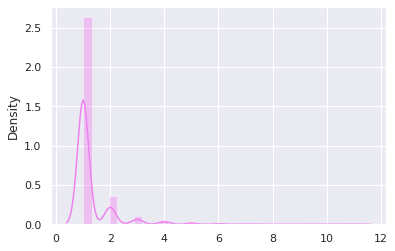

In [18]:
## b) Mostrar cómo están distribuidas las palabras de cierto artı́culo
import seaborn as sns
import matplotlib.pyplot as plt

palabras_omitir = ['ya','el', 'la','lo', 'los', 'las', 'un', 'una', 'unos', 'unas','a', 'ante',
                  'bajo','cabe','como','con','contra','de','desde','durante','en','entre','excepto',
                  'hacia','hace','hasta','mediante','para','por','segun','sin','sobre','tras',
                  'del','que','se','muchos','muchas','mucho','mucha','hace','y','o','e','Mucho',
                  'han','ha','he','Y','al','ello','conlleva','todos','todo','todas','toda','es',
                   'sea','Muchas','algunas','algunos','pero','no','si','pocas','“Una','da','-y','más','siguen',
                   'parte','esta','Pero','otra','otro','–casi','ninguna-','siendo','Este','también',
                  'sino','sido','sigue','siendo-','aún','mayor','habría','Las','vez','menos','gran',
                  'cuales','ser','Por','ni','En','últimas','basado','Se','como:-','su','además','sólo',
                  'sus','misma','antes','esta.','deben','misma']
with open('noticias.json') as file:
    data = json.load (file)
    lista_palabras_sin_omitir = data[0]['cuerpo'].split()
    lista_palabras = []
    for w in lista_palabras_sin_omitir:
        if w not in palabras_omitir:
            lista_palabras.append(w)

    frecuencia_palabras = {}
    frecuencia = []
    for w in lista_palabras:
        if w not in frecuencia_palabras:
            cant = lista_palabras.count(w)
            frecuencia_palabras[w] = cant
            frecuencia.append(cant)
    sns.set()
    sns.distplot(frecuencia,color="violet")
    plt.show()

In [19]:
## c) Mostrar el número promedio, máximo y mı́nimo de palabras, sentencias, párrafos de un conjunto de noticias de su preferencia. 
import numpy as np
import statistics as stats

with open('noticias.json') as file:
    data = json.load (file)
    palabras = []
    sentencias = []
    parrafos = []
    for noticia in data:
        if noticia['seccion'] == 'CIENCIA':
            palabras.append(len(noticia['cuerpo'].split()))
            sentencias.append(noticia['cuerpo'].count('.'))
            parrafos.append(len(re.findall(r'[.].',noticia['cuerpo'])))

    print("PROMEDIO DE PALABRAS ", stats.mean(palabras))
    print("MÁXIMO DE PALABRAS ", max(palabras))
    print("MÍNIMO DE PALABRAS ", min(palabras))
    
    print("PROMEDIO DE SENTENCIAS ", stats.mean(sentencias))
    print("MÁXIMO DE SENTENCIAS ", max(sentencias))
    print("MÍNIMO DE SENTENCIAS ", min(sentencias))
    
    print("PROMEDIO DE PÁRRAFOS ", stats.mean(parrafos))
    print("MÁXIMO DE PÁRRAFOS ", max(parrafos))
    print("MÍNIMO DE PÁRRAFOS ", min(parrafos))

PROMEDIO DE PALABRAS  467.6923076923077
MÁXIMO DE PALABRAS  990
MÍNIMO DE PALABRAS  147
PROMEDIO DE SENTENCIAS  16.692307692307693
MÁXIMO DE SENTENCIAS  36
MÍNIMO DE SENTENCIAS  4
PROMEDIO DE PÁRRAFOS  15.692307692307692
MÁXIMO DE PÁRRAFOS  35
MÍNIMO DE PÁRRAFOS  3
